In [59]:
using CSV
using DataFrames
using Seaborn
using Statistics
using Distributions
using Plots

In [2]:
data = DataFrame(CSV.File("sensor_data_700.txt";
        header=["data", "time", "ir", "lidar"]))

,data,time,ir,lidar
,Int64,Int64,Int64,Int64
1,20180205,84535,16,734
2,20180205,84538,17,736
3,20180205,84541,6,733
4,20180205,84544,17,738
5,20180205,84547,16,734
6,20180205,84550,20,732
7,20180205,84553,20,737
8,20180205,84557,23,744
9,20180205,84600,17,739


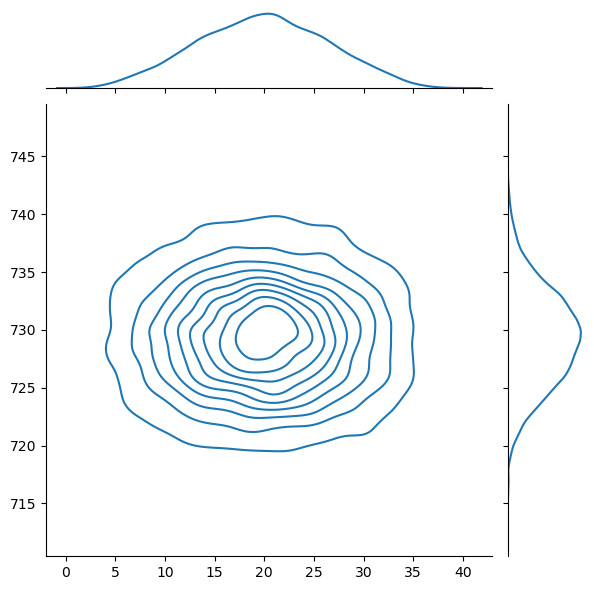

PyObject <seaborn.axisgrid.JointGrid object at 0x7fdee4699910>

In [4]:
d = data[(data.time.<160000).&(data.time.>=120000),:]
Seaborn.jointplot(x="ir", y="lidar", d.ir, d.lidar,   kind="kde")

In [5]:
println("光センサの計測値の分散:", var(d.ir))
println("LiDARの計測値の分散:", var(d.lidar))
println("共分散:", cov(d.ir, d.lidar))

光センサの計測値の分散:42.117126367701594
LiDARの計測値の分散:17.702026469211454
共分散:-0.31677803385436953


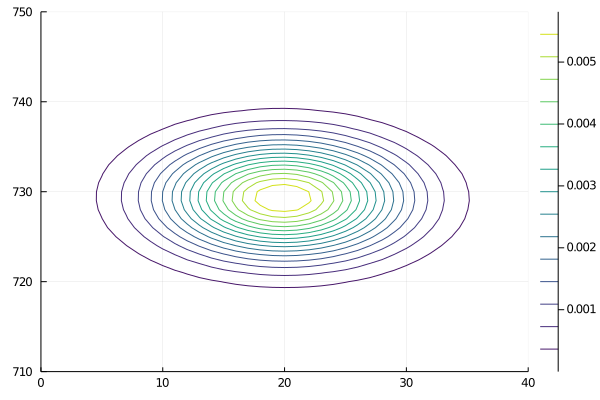

In [63]:
mu = [mean(d.ir), mean(d.lidar)]
sigma = [var(d.ir) cov(d.ir, d.lidar) ; 
    cov(d.ir, d.lidar) var(d.lidar)]
irlidar = MvNormal(mu, sigma)

x = range(0,40, step=1)
y = range(710, 750, step=1)
z = [pdf(irlidar,[j, i]) for i in y, j in x]
cp = Plots.contour(x, y, z, color=:viridis)

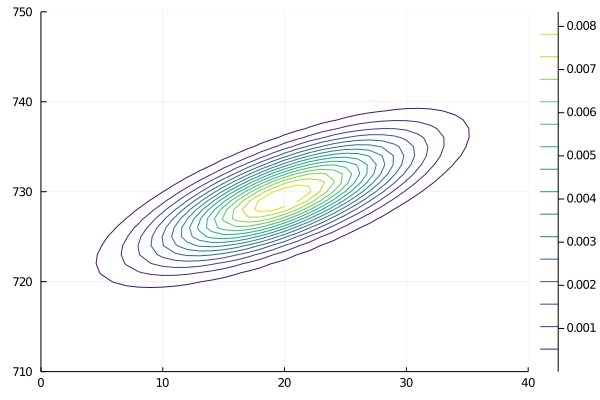

In [64]:
tmp = MvNormal(mu, sigma + [0 20; 20 0])
cp = Plots.contour(x, y, [pdf(tmp,[j, i]) for i in y, j in x], color=:viridis)